In [ ]:
import pandas as pd
import seaborn as sns
import re, nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import string
from nltk.corpus import stopwords
nltk.download('stopwards')

[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index


False

In [ ]:
df=pd.read_csv('/content/Tweets.csv')

In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df['airline_sentiment'].unique()


array(['neutral', 'positive', 'negative'], dtype=object)

<ipython-input-13-4ffc4dcfb26d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-13-4ffc4dcfb26d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="airline_sentiment",data=df, palette=col)


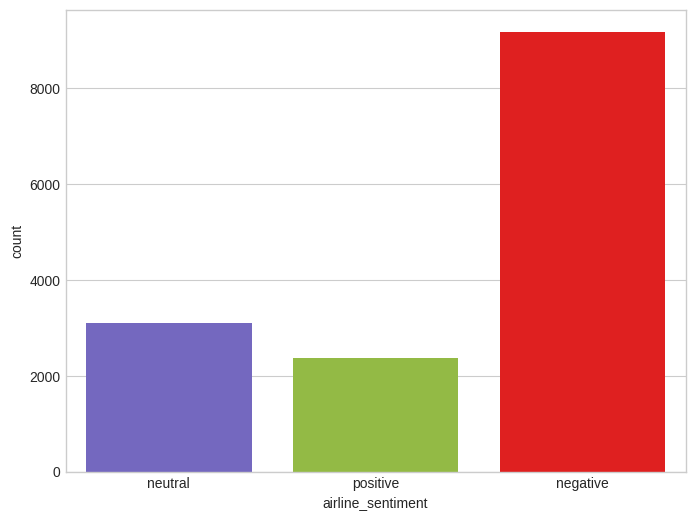

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
col = ['slateblue','yellowgreen','red']
ax = sns.countplot(x="airline_sentiment",data=df, palette=col)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

<ipython-input-17-ff15bd995f27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='airline',data=df,palette=col)


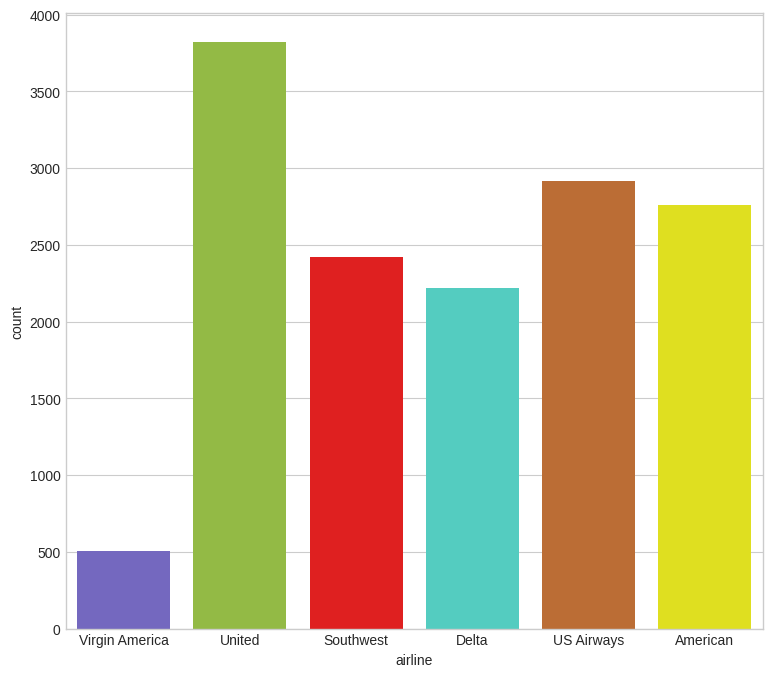

In [ ]:
col = ['slateblue', 'yellowgreen','red', 'turquoise', 'chocolate', 'yellow']
plt.figure(figsize=(9,8))
ax=sns.countplot(x='airline',data=df,palette=col)

total number of tweets for each airline 



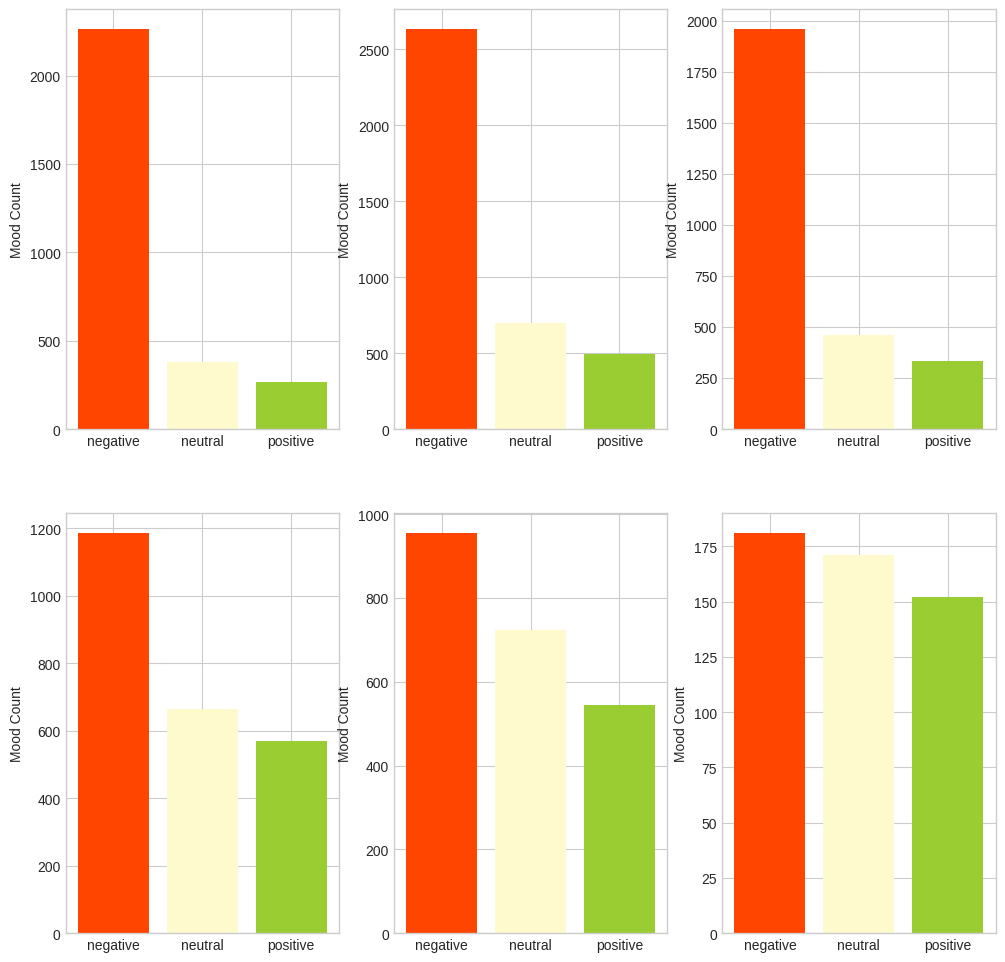

In [ ]:
print("total number of tweets for each airline \n")
df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
airlines=['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12,12))
for i in airlines:
  indices=airlines.index(i)
  plt.subplot(2,3,indices+1)
  new_df=df[df['airline']==i]
  count=new_df['airline_sentiment'].value_counts()
  Index=[1,2,3]
  plt.bar(Index,count,color=['orangered','lemonchiffon','yellowgreen'])
  plt.xticks(Index,['negative','neutral','positive'])
  plt.ylabel('Mood Count')
  plt.xlabel('Mood')
  plt.tittle('')

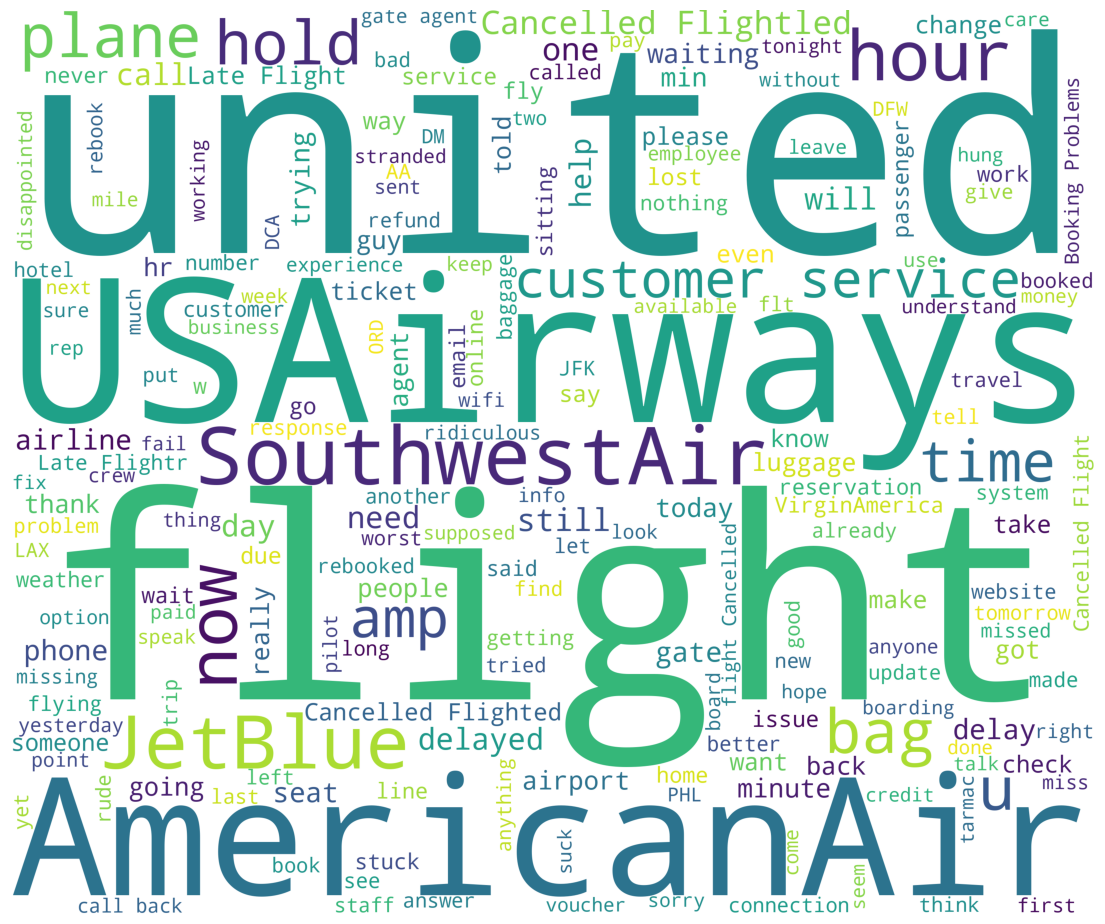

In [ ]:
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['airline_sentiment']=='negative']
words=''.join(new_df['text'])
cleaned_word=' '.join([word for word in words.split()
                          if 'http' not in word
                              and not word.startswith('@')
                              and word!='RT'
                          ])
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(14,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()